# Euro Data Cube: Access to  Sentinel-1, Sentinel-2, Sentinel-5P, Pleiades, PlanetScope on Sentinel-hub

The Euro Data Cube Jupyter Lab environment has all dependencies preinstalled and the necessary credentials prepared as environment variables.

To run this notebook outside of this environment please follow the setup outlined [here](./99_EDC_Setup.ipynb).

## Using xcube to access different data sets in Sentinel Hub

This notebook shows how to access different data sets through the Sentinel Hub API:
1. Access **Sentiel-1** through xcube Sentinel hub Store
2. Access **Sentiel-2** through xcube Sentinel hub Store
3. Access **Sentiel-5P** through xcube Sentinel hub Store
4. Access **Pleiades** through xcube Sentinel hub Store
5. Access **PlanetScope** through xcube Sentinel hub Store

In [2]:
# Set Sentinel Hub credentials
sh_credentials = dict(client_id='e41c5e66-d86b-49ac-90c2-be620fd09fd4',
                      client_secret='[J*kkV/zYBJ-ZJcOh07jb+($6Apk,ddmj>Zjs%_X',
                      instance_id='2e889315-2980-403e-8f51-fafe967d11ad')

In [3]:
from xcube_sh.config import CubeConfig
from xcube_sh.cube import open_cube
from xcube_sh.sentinelhub import SentinelHub
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from sentinelhub import BBox, WmsRequest, DataSource, SHConfig
from functools import partial

# 1. Sentinel-1 GRD

Setting of AOI bounding box

In [3]:
x1 = 10.00  # degree
y1 = 54.27  # degree
x2 = 11.00  # degree
y2 = 54.60  # degree

bbox = x1, y1, x2, y2

In [4]:
spatial_res = 0.00018   # = 20.038 meters in degree

 Sentinel Hub currently supported Sentinel-1 GRD (Ground Range Detected) products: [here](https://docs.sentinel-hub.com/api/latest/#/data/Sentinel-1-GRD)

In [5]:
cube_config = CubeConfig(dataset_name='S1GRD',
                         band_names=['VH'],
                         tile_size=[512, 512],
                         crs = "http://www.opengis.net/def/crs/EPSG/0/4326",
                         spatial_res = spatial_res,
                         geometry=bbox,
                         time_range=['2019-05-14', '2019-07-31'],
                         time_period='2D')  

In [6]:
cube = open_cube(cube_config, **sh_credentials)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 2048, lon: 5632, time: 40)
Coordinates:
  * lat        (lat) float64 54.64 54.64 54.64 54.64 ... 54.27 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.0 ... 11.01 11.01 11.01 11.01
  * time       (time) datetime64[ns] 2019-05-15 2019-05-17 ... 2019-08-01
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(40, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    VH         (time, lat, lon) float32 dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S1GRD Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2020-04-16T07:40:27.134488
    processing_level:          L1B
    time_coverage_start:       2019-05-14T00:00:00+00:00
    time_coverage_end:         2019-08-02T00:00:00+00:00
    time_coverage_duration:    P80DT0H0M0S
    time_coverage_resolution:  P2DT0H0M0S
    geospatial_lon_min:        10.0
    geospatial_lat_min:        54.27
    geospatial_lon_max:        11.01376
    geospatial_lat_max:        54.63864

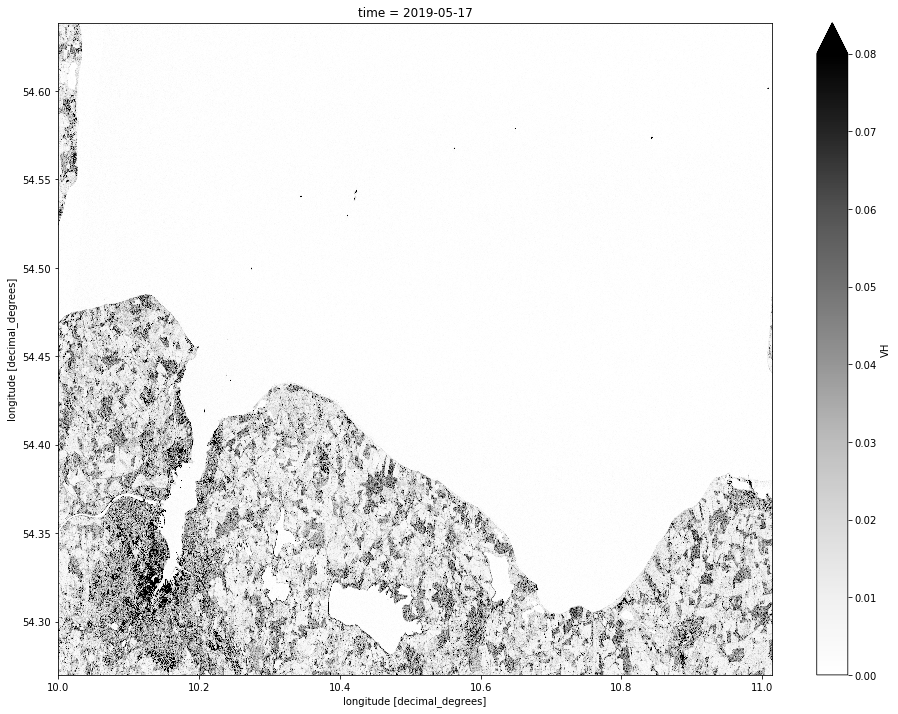

In [8]:
cube.VH.isel(time=1).plot.imshow(cmap='Greys',vmax =0.08, figsize = [16,12])

# Sentinel-2 L2A (SLC)

 Sentinel Hub currently supported Sentinel-2 products: [here](https://docs.sentinel-hub.com/api/latest/#/data/Sentinel-2-L2A)

In [9]:
cube_config = CubeConfig(dataset_name='S2L2A',
                         band_names=['SCL'],
                         tile_size=[512, 512],
                         geometry=bbox,
                         spatial_res=spatial_res,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_tolerance='30M')  

In [ ]:
cube = open_cube(cube_config, **sh_credentials)
cube

In [ ]:
cube.SCL.isel(time=5, lat=slice(0,2000),lon=slice(0,2000)).plot.imshow(cmap='tab20c')

# 3. Sentinel-5P L2

 Sentinel Hub currently supported Sentinel-5P products: [here](https://docs.sentinel-hub.com/api/latest/#/data/Sentinel-5P-L2)

In [13]:
cube_config = CubeConfig(dataset_name='S5PL2',
                         band_names=['NO2'],
                         tile_size=[512, 512],
                         geometry=bbox,
                         spatial_res=(bbox[2]-bbox[0])/512,
                         time_range=['2018-05-14', '2018-07-31'],
                         time_period='3D')  

In [14]:
sh_credentials.update(api_url='https://creodias.sentinel-hub.com/api/v1') # Sentinel-3 OLCI, Sentinel-3 SLSTR and Sentinel-5 layers are processed on different infrastructure, which requires to used different end-point

In [15]:
cube = open_cube(cube_config, **sh_credentials)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 169, lon: 512, time: 27)
Coordinates:
  * lat        (lat) float64 54.6 54.6 54.6 54.59 ... 54.28 54.27 54.27 54.27
  * lon        (lon) float64 10.0 10.0 10.0 10.01 10.01 ... 10.99 11.0 11.0 11.0
  * time       (time) datetime64[ns] 2018-05-15T12:00:00 ... 2018-08-01T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(27, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    NO2        (time, lat, lon) float32 dask.array<chunksize=(1, 169, 512), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     S5PL2 Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2020-04-16T07:43:13.275694
    processing_level:          None
    time_coverage_start:       2018-05-14T00:00:00+00:00
    time_coverage_end:         2018-08-03T00:00:00+00:00
    time_coverage_duration:    P81DT0H0M0S
    time_coverage_resolution:  P3DT0H0M0S
    geospatial_lon_min:        10.0
    geospatial_lat_min:        54.27
    geospatial_lon_max:        11.0
    geospatial_lat_max:        54.600078125

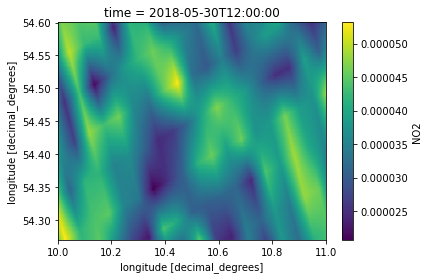

In [16]:
cube.NO2.isel(time=5).plot.imshow()

# 4. Pleiades

Update of instance id

In [37]:
sh_credentials.update(instance_id='def18ffb-8fa0-4a95-9f1e-189867871471')
sh_credentials.update(api_url='https://services.sentinel-hub.com/api/v1') # changing of the base url back

New bbox for scenes available for Pleiades (Esselunga supermarket Rome). Others [here](https://docs.google.com/spreadsheets/d/1mlr8oFDkTJyVA_b6r3vfYQFKs9NbvHQyuCMu73x6Aug/edit#gid=974155538)

In [38]:
x1 = 1398664 # meters
y1 = 5145138  # meters

spatial_res = 2 # 2m resolution of Pleiades

In [39]:
def coor(axis,res,point):
    return res*axis + point
point = partial(coor,500,3)

In [40]:
bbox = x1, y1, point(x1), point(y1)

In [50]:
cube_config = CubeConfig(dataset_name='CUSTOM',
                         band_names=['B0', 'B1', 'B2'],                        
                         tile_size=[500, 500],
                         crs='http://www.opengis.net/def/crs/EPSG/0/3857',
                         geometry=bbox,
                         time_range=['2019-03-31', '2019-05-01'],
                         time_period='10d',
                         spatial_res=spatial_res,
                         band_sample_types='UINT8',
                         collection_id='3c4daecf-09f3-451c-8c3c-90e356cbd673')

In [51]:
cube = open_cube(cube_config, **sh_credentials)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 4, x: 1000, y: 1000)
Coordinates:
  * time       (time) datetime64[ns] 2019-04-05 2019-04-15 2019-04-25 2019-05-05
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(4, 2), meta=np.ndarray>
  * x          (x) float64 1.399e+06 1.399e+06 1.399e+06 ... 1.401e+06 1.401e+06
  * y          (y) float64 5.147e+06 5.147e+06 5.147e+06 ... 5.145e+06 5.145e+06
Dimensions without coordinates: bnds
Data variables:
    B0         (time, y, x) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B1         (time, y, x) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B2         (time, y, x) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     CUSTOM Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2020-04-16T12:39:31.468662
    processing_level:          None
    time_coverage_start:       2019-03-31T00:00:00+00:00
    time_coverage_end:         2019-05-10T00:00:00+00:00
    time_coverage_duration:    P40DT0H0M0S
    time_coverage_resolution:  P10DT0H0M0S

In [52]:
cube.time

<xarray.DataArray 'time' (time: 4)>
array(['2019-04-05T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-04-25T00:00:00.000000000', '2019-05-05T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-04-05 2019-04-15 2019-04-25 2019-05-05
Attributes:
    standard_name:  time
    bounds:         time_bnds

In [108]:
cube_time = cube.sel(time='2019-04-05')

y, x = cube_time.B0.shape

RED(B2), GREEN(B1), BLUE(B0) [viz](https://docs.sentinel-hub.com/api/latest/#/data/Airbus-Pleiades)

In [109]:
rgb_data = np.zeros((y, x, 3), 'uint8')
rgb_data[:, :, 0] = cube_time.B2.values
rgb_data[:, :, 1] = cube_time.B1.values
rgb_data[:, :, 2] = cube_time.B0.values

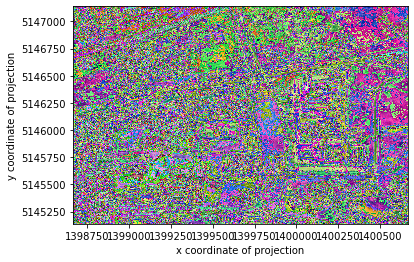

In [110]:
rgb_array = xr.DataArray(rgb_data, dims=('y', 'x', 'rgb'),  coords=dict(x=cube.B0.x, y=cube.B0.y))
rgb_array.plot.imshow()

# Pleiades (directly from Sentinel Hub)

In [111]:
CLIENT_ID = 'e41c5e66-d86b-49ac-90c2-be620fd09fd4'
CLIENT_SECRET = '[J*kkV/zYBJ-ZJcOh07jb+($6Apk,ddmj>Zjs%_X'

INSTANCE_ID = 'def18ffb-8fa0-4a95-9f1e-189867871471' # instance_id  corresponding to PlanetScope instance (can be found at Sentinel-hub dashboard)
COLECTION_ID = '3c4daecf-09f3-451c-8c3c-90e356cbd673' # colleciton_id (can be found at Sentinel-hub dashboard at instance configuration)
LAYER_ID = 'TRUECOLOR'  # layer_id can be found at Sentinel-hub dashboard at instance configuration

In [112]:
config = SHConfig()
config.sh_client_id = CLIENT_ID
config.sh_client_secret = CLIENT_SECRET
config.instance_id = INSTANCE_ID

In [113]:
x1 = 1398664 # meters
y1 = 5145138  # meters
spatial_res = 3 # 3m resolution of PlanetScope

In [114]:
def coor(axis,res,p):
    return res*axis + p
point = partial(coor,500,3)

In [115]:
bbox = BBox(bbox=[x1, y1, point(x1), point(y1)], crs=3857)

In [116]:
byoc_request = WmsRequest(
    data_source=DataSource(COLECTION_ID),
    layer=LAYER_ID,
    bbox=bbox,
    width=500,
    time=('2019-03-31', '2019-05-01'),
    config=config
)

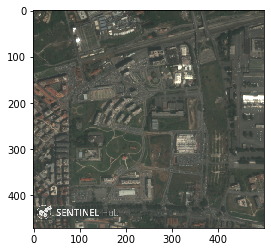

In [117]:
byoc_data = byoc_request.get_data()
plt.imshow(byoc_data[0])

# 5. PlanetScope

Update of instance

In [125]:
sh_credentials.update(instance_id='c973c18f-ffb2-4f3a-aacd-7bf6eb66712c')

New bbox for scenes available for PlaneteScope (Esselunga supermarket Rome). Others [here](https://docs.google.com/spreadsheets/d/1mlr8oFDkTJyVA_b6r3vfYQFKs9NbvHQyuCMu73x6Aug/edit#gid=974155538)

In [126]:
x1 = 1398664 # meters
y1 = 5145138  # meters

spatial_res = 3 # 3m resolution of PlanetScope

In [127]:
width = 500
height = 500
x2 = spatial_res*width + x1
y2 = spatial_res*height + y1

bbox = x1, y1, x2, y2

In [128]:
cube_config = CubeConfig(dataset_name='CUSTOM',
                         band_names=['B1', 'B2', 'B3'],                        
                         tile_size=[width, height],
                         crs='http://www.opengis.net/def/crs/EPSG/0/3857',
                         geometry=bbox,
                         time_range=['2019-03-31', '2019-05-01'],
                         time_period='1d',
                         spatial_res=spatial_res,
                         band_sample_types='UINT8',
                         collection_id='3c4daecf-09f3-451c-8c3c-90e356cbd673')

In [129]:
cube = open_cube(cube_config, **sh_credentials)
cube

<xarray.Dataset>
Dimensions:    (bnds: 2, time: 32, x: 500, y: 500)
Coordinates:
  * time       (time) datetime64[ns] 2019-03-31T12:00:00 ... 2019-05-01T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(32, 2), meta=np.ndarray>
  * x          (x) float64 1.399e+06 1.399e+06 1.399e+06 ... 1.4e+06 1.4e+06
  * y          (y) float64 5.147e+06 5.147e+06 5.147e+06 ... 5.145e+06 5.145e+06
Dimensions without coordinates: bnds
Data variables:
    B1         (time, y, x) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B2         (time, y, x) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
    B3         (time, y, x) uint8 dask.array<chunksize=(1, 500, 500), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    title:                     CUSTOM Data Cube Subset
    history:                   [{'program': 'xcube_sh.store.SentinelHubStore'...
    date_created:              2020-04-16T08:24:17.529902
    processing_level:          None
    time_coverage_start:       2019-03-31T00:00:00+00:00
    time_coverage_end:         2019-05-02T00:00:00+00:00
    time_coverage_duration:    P32DT0H0M0S
    time_coverage_resolution:  P1DT0H0M0S

In [130]:
cube_time = cube.isel(time=0, x=slice(0,width),y=slice(0,height))
y, x = cube_time.B1.shape

RED(B3), GREEN(B2), BLUE(B1) [viz](https://docs.sentinel-hub.com/api/latest/#/data/PlanetScope)

In [131]:
rgb_data = np.zeros((y, x, 3), 'uint8')
rgb_data[:, :, 0] = cube_time.B3.values
rgb_data[:, :, 1] = cube_time.B2.values
rgb_data[:, :, 2] = cube_time.B1.values

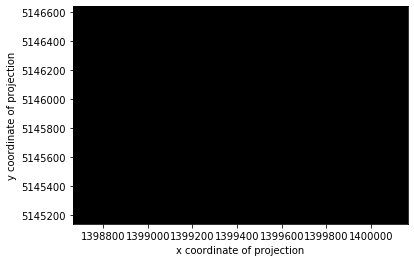

In [132]:
rgb_array = xr.DataArray(rgb_data, dims=('y', 'x', 'rgb'),  coords=dict(x=cube.B1.x, y=cube.B1.y))
rgb_array.plot.imshow()

# PlanetScope (directly from Sentinel Hub)

In [118]:
CLIENT_ID = 'e41c5e66-d86b-49ac-90c2-be620fd09fd4'
CLIENT_SECRET = '[J*kkV/zYBJ-ZJcOh07jb+($6Apk,ddmj>Zjs%_X'

INSTANCE_ID = 'c973c18f-ffb2-4f3a-aacd-7bf6eb66712c' # instance_id  corresponding to PlanetScope instance (can be found at Sentinel-hub dashboard)
COLECTION_ID = 'f4a28a33-9b73-4edb-9a40-f20cc0d45106' # colleciton_id (can be found at Sentinel-hub dashboard at instance configuration)
LAYER_ID = '1_TRUE-COLOR' # layer_id can be found at Sentinel-hub dashboard at instance configuration

In [119]:
config = SHConfig()
config.sh_client_id = CLIENT_ID
config.sh_client_secret = CLIENT_SECRET
config.instance_id = INSTANCE_ID

In [120]:
x1 = 1398864 # meters
y1 = 5145138  # meters
spatial_res = 3 # 3m resolution of PlanetScope

In [121]:
def coor(axis,res,point):
    return res*axis + point
res = partial(coor,500,3)

In [122]:
bbox = BBox(bbox=[x1, y1, res(x1), res(y1)], crs=3857)

In [123]:
byoc_request = WmsRequest(
    data_source=DataSource(COLECTION_ID),
    layer=LAYER_ID,
    bbox=bbox,
    width=500,
    time=('2019-03-31', '2019-05-01'),
    config=config
)

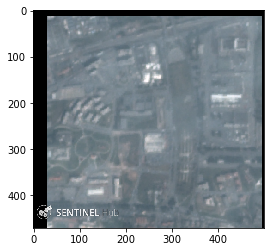

In [124]:
byoc_data = byoc_request.get_data()
plt.imshow(byoc_data[0])